In [2]:
import numpy as np
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import PIL.Image
from read_HiC import name_chromosomes

import sys
path=r'C:\Users\scalvinib\Documents\Phd_project_reduced\work directory jupyter lab\topology\genome_topology\functions'
sys.path.append(path)

from plotting_tools import set_layout
from genome_topology import normalize_psc
from genome_topology import get_matrix
from genome_topology import fractal_dimension
from genome_topology import make_graph

In [31]:
contacts=pd.read_csv('data/Hi-C data/test2.txt', sep= '\t', header= None )
contacts.columns =['Index1', 'Index2', 'Counts']

contacts=  contacts.sort_values('Index1')

In [32]:
contacts

,Index1,Index2,Counts
0,0,0,4080.0
39918,0,2556,14.0
39644,0,2547,10.0
118796,0,4419,139.0
39366,0,2538,5.0
...,...,...,...
115567,4176,4347,105.0
115105,4176,4338,108.0
114642,4176,4329,147.0
114182,4176,4320,84.0


In [33]:
thresh_counts= 100
plot_matrix=True
path_savematrix='results/matrices/ecoli'
selected_contacts=contacts[contacts['Counts']>=thresh_counts]

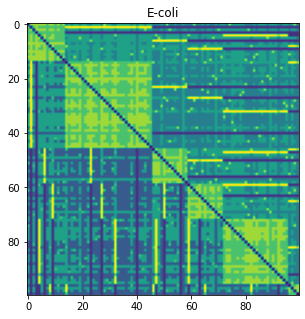

In [34]:
index= [selected_contacts['Index1'], selected_contacts['Index2']]
index=np.array(index)
index= np.transpose(index)
N_contacts = len(index)
mat, psc = get_matrix(index, 'Ecoli')
P, S, X=normalize_psc(psc, N_contacts)
Dim_fractal, r2_fractalfit=fractal_dimension(mat, plot_fig=0)
G=make_graph(index)
clustering= nx.average_clustering(G)
    
if plot_matrix:
    plt.figure(figsize=(5, 5))
    plt.imshow(mat[600:700, 600:700])
    plt.title('E-coli')
    
if path_savematrix:
    PIL.Image.fromarray(mat.astype(float)).save("{}/top_matrix2.tif".format(
        path_savematrix))

Text(0.5, 1.0, 'E-coli')

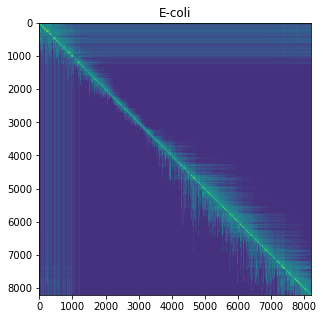

In [35]:
plt.figure(figsize=(5, 5))
plt.imshow(mat)
plt.title('E-coli')